# Importing Neccessary Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings(action = 'ignore')

# Loading the Data

In [ ]:
data = pd.read_csv('/content/project1_df.csv')

# Sanity Check of Data

In [ ]:
data.shape

(55000, 13)

In [ ]:
# to get first five rows
data.head(5)

CID         TID  Gender     Age Group        Purchase Date  \
0  943146  5876328741  Female         25-45  30/08/2023 20:27:08   
1  180079  1018503182    Male         25-45  23/02/2024 09:33:46   
2  337580  3814082218   Other  60 and above  06/03/2022 09:09:50   
3  180333  1395204173   Other  60 and above  04/11/2020 04:41:57   
4  447553  8009390577    Male         18-25  31/05/2022 17:00:32   

   Product Category Discount Availed    Discount Name  Discount Amount (INR)  \
0       Electronics              Yes        FESTIVE50                  64.30   
1       Electronics              Yes  SEASONALOFFER21                 175.19   
2          Clothing              Yes  SEASONALOFFER21                 211.54   
3  Sports & Fitness               No              NaN                   0.00   
4  Sports & Fitness              Yes         WELCOME5                 439.92   

   Gross Amount   Net Amount Purchase Method   Location  
0    725.304000   661.004000     Credit Card  Ahmedabad  
1   4638.991875  4463.801875     Credit Card  Bangalore  
2   1986.372575  1774.832575     Credit Card      Delhi  
3   5695.612650  5695.612650      Debit Card      Delhi  
4   2292.651500  1852.731500     Credit Card      Delhi

In [ ]:
# info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55000 entries, 0 to 54999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CID                    55000 non-null  int64  
 1   TID                    55000 non-null  int64  
 2   Gender                 55000 non-null  object 
 3   Age Group              55000 non-null  object 
 4   Purchase Date          55000 non-null  object 
 5   Product Category       55000 non-null  object 
 6   Discount Availed       55000 non-null  object 
 7   Discount Name          27415 non-null  object 
 8   Discount Amount (INR)  55000 non-null  float64
 9   Gross Amount           55000 non-null  float64
 10  Net Amount             55000 non-null  float64
 11  Purchase Method        55000 non-null  object 
 12  Location               55000 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 5.5+ MB


In [ ]:
# Convert 'Purchase Date' to datetime format
data['Purchase Date'] = pd.to_datetime(data['Purchase Date'], errors='coerce')

In [ ]:
# check for null values
data.isnull().sum()

CID                          0
TID                          0
Gender                       0
Age Group                    0
Purchase Date                0
Product Category             0
Discount Availed             0
Discount Name            27585
Discount Amount (INR)        0
Gross Amount                 0
Net Amount                   0
Purchase Method              0
Location                     0
dtype: int64

In [ ]:
# Fill the missing values
# for categorical column 'Discount_Name'
for i in data.select_dtypes(include = 'object').columns:
    data[i].fillna(data[i].mode()[0], inplace = True)

In [ ]:
# check for null values
data.isnull().sum()

CID                      0
TID                      0
Gender                   0
Age Group                0
Purchase Date            0
Product Category         0
Discount Availed         0
Discount Name            0
Discount Amount (INR)    0
Gross Amount             0
Net Amount               0
Purchase Method          0
Location                 0
dtype: int64

In [ ]:
data.columns

Index(['CID', 'TID', 'Gender', 'Age Group', 'Purchase Date',
       'Product Category', 'Discount Availed', 'Discount Name',
       'Discount Amount (INR)', 'Gross Amount', 'Net Amount',
       'Purchase Method', 'Location'],
      dtype='object')

# Save the cleaned data


In [ ]:
data.to_csv('ecommerce_cleaned_data.csv', index=False)


NameError: name 'data' is not defined

# Exploratory Data Analysis

# To visualize the Pairplot

In [ ]:
# descriptive statistics
data.describe(include = 'number').T

count          mean           std           min  \
CID                    55000.0  5.512456e+05  2.606033e+05  1.000090e+05   
TID                    55000.0  5.504740e+09  2.594534e+09  1.000163e+09   
Discount Amount (INR)  55000.0  1.369868e+02  1.653755e+02  0.000000e+00   
Gross Amount           55000.0  3.012937e+03  1.718431e+03  1.364543e+02   
Net Amount             55000.0  2.875950e+03  1.726128e+03 -3.511198e+02   

                                25%           50%           75%           max  
CID                    3.237170e+05  5.500885e+05  7.769558e+05  9.999960e+05  
TID                    3.252604e+09  5.498383e+09  7.747933e+09  9.999393e+09  
Discount Amount (INR)  0.000000e+00  0.000000e+00  2.741150e+02  5.000000e+02  
Gross Amount           1.562111e+03  2.954266e+03  4.342222e+03  8.394826e+03  
Net Amount             1.429552e+03  2.814911e+03  4.211408e+03  8.394826e+03

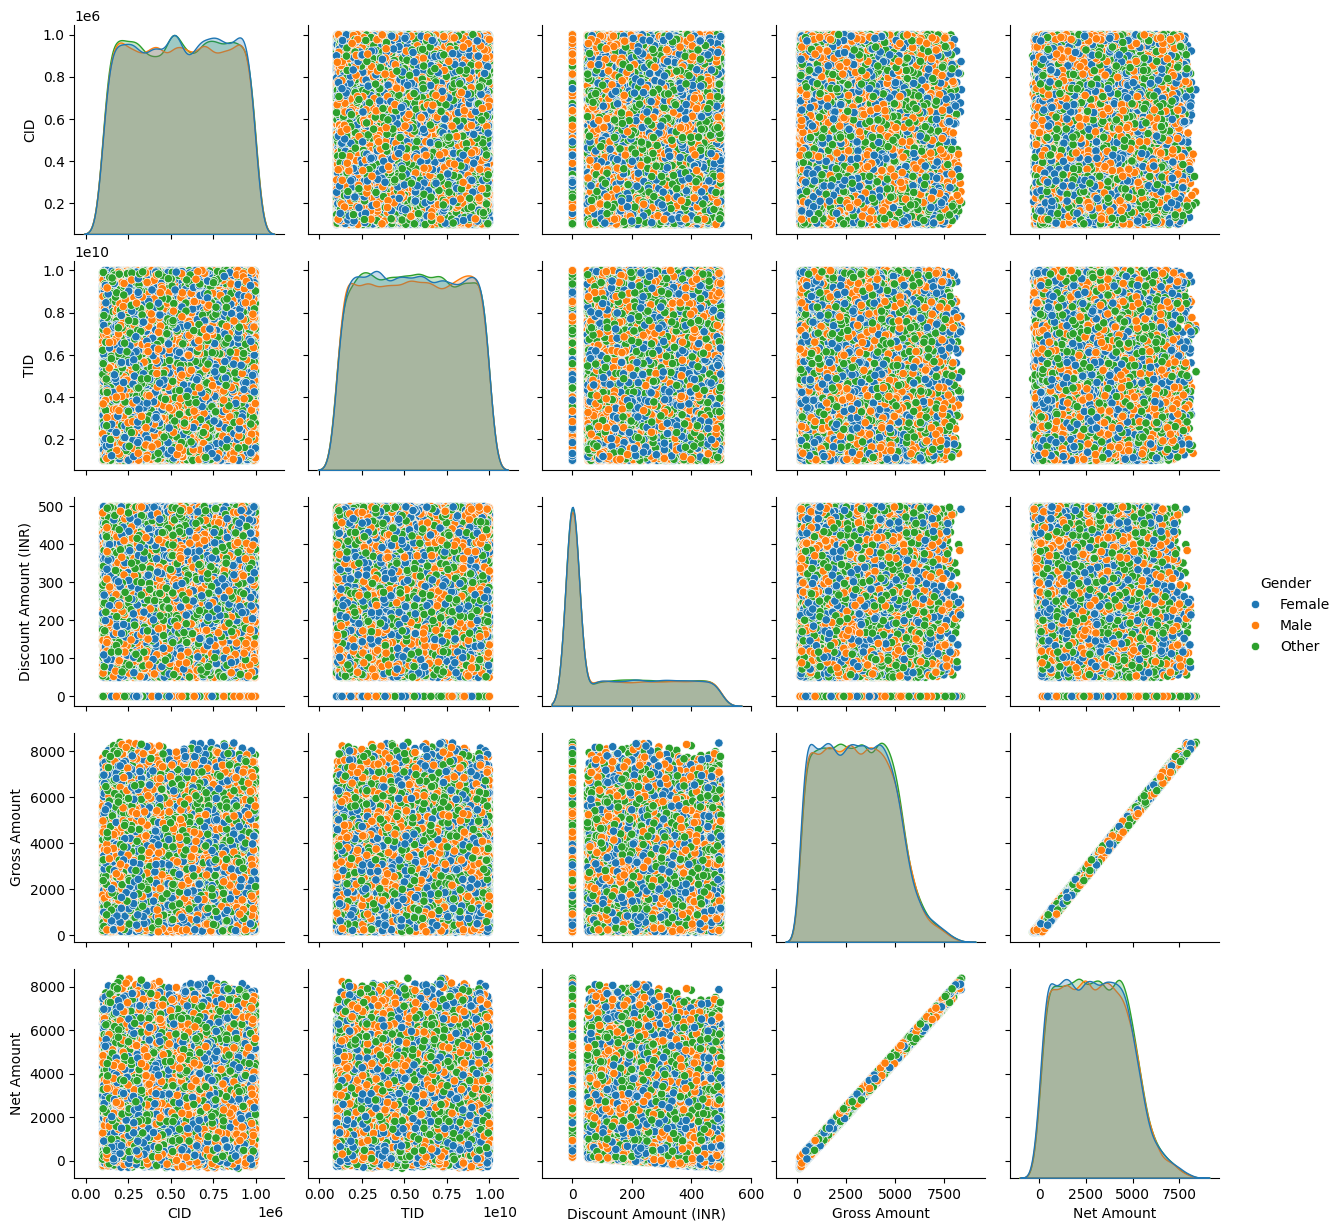

In [ ]:
sns.pairplot(data, hue = 'Gender')
plt.show()

# Histogram to understand the Distribution

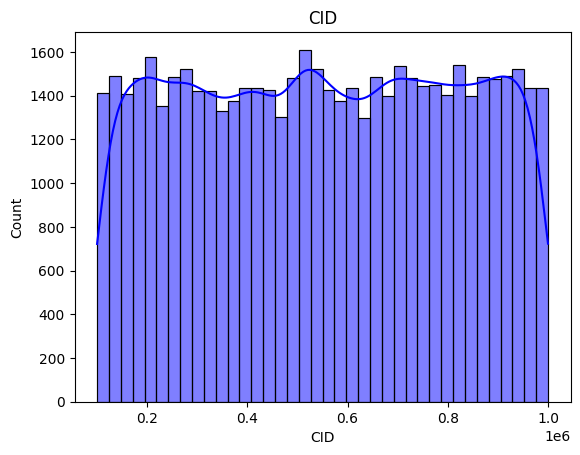

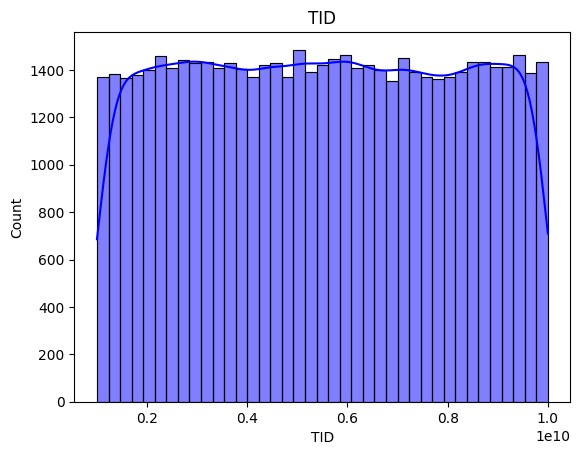

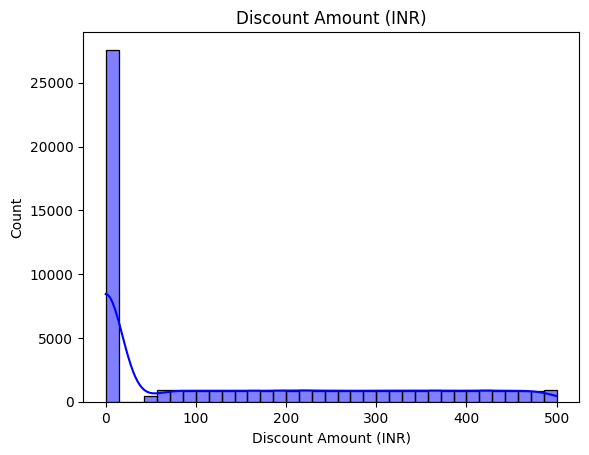

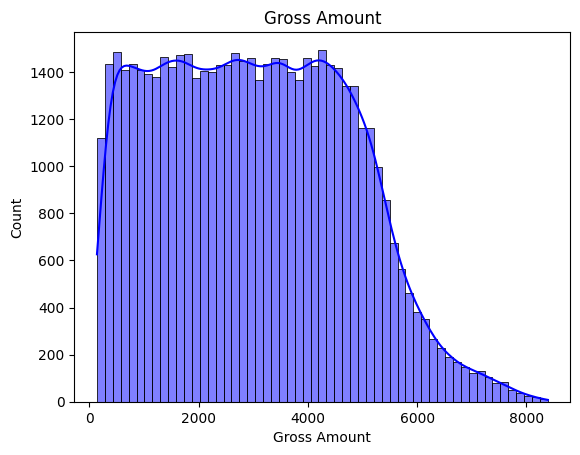

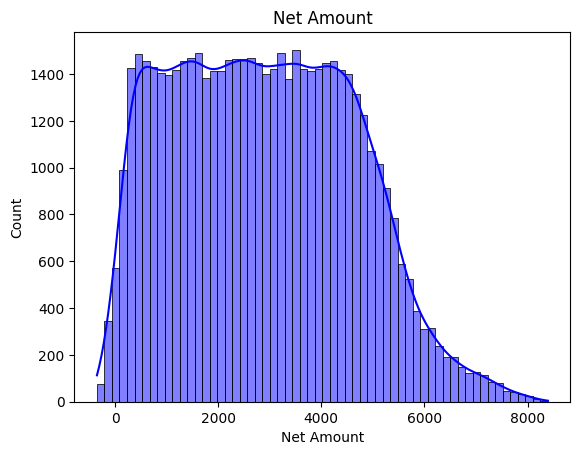

In [ ]:
for i in data.select_dtypes(include = 'number').columns:
    sns.histplot(data = data, x = i, kde = True, color = 'blue')
    plt.title(f'{i}')
    plt.show()

# Gender distribution

In [ ]:
gender_dist = data['Gender'].value_counts().reset_index()
gender_dist.columns = ['Gender','Count']
fig_gender = px.bar(gender_dist,
                    x = 'Gender', y = 'Count',
                    title='Gender Distribution',
                    text_auto = True,
                    color = 'Gender')
fig_gender.show()

# Age Group distribution

In [ ]:
age_group = data['Age Group'].value_counts().reset_index()
age_group.columns = ['Age Group','Count']
fig = px.bar(age_group,
                       x = 'Count', y = 'Age Group',
                       title = 'Age Group Distribution',
                       color = 'Age Group')
fig.show()

# Product Category

In [ ]:
product_category = data['Product Category'].value_counts().reset_index()
product_category.columns = ['Product Category','Count']
fig_category = px.bar(product_category,
                      x = 'Product Category', y = 'Count',
                      color = 'Product Category',
                      title = 'Product Category Distribution',
                     )
fig_category.show()

# Time series plot for Purchase Date vs Gross Amount

In [ ]:
data_time_series = data.groupby('Purchase Date').agg({'Gross Amount': 'sum'}).reset_index()
fig = px.line(data_time_series,
              x = 'Purchase Date',
              y = 'Gross Amount',
              title='Time Series of Gross Amount by Purchase Date')
fig.show()

In [ ]:
# Scatter plot for Gross Amount vs Net Amount
fig = px.scatter(data, x = 'Gross Amount',
                         y = 'Net Amount',
                         title = 'Gross Amount vs Net Amount',
                         trendline = 'ols')
fig.show()

# Purchase Method distribution

In [ ]:
fig = px.pie(data, names='Purchase Method',
                             title='Purchase Method Distribution')
fig.show()

# Location-based analysis

In [ ]:
location_dist = data['Location'].value_counts().reset_index()
location_dist.columns = ['Location','Count']
fig = px.bar(location_dist,
                      x = 'Location', y = 'Count',
                      color = 'Location',
                      title='Location Distribution')
fig.show()

# Gross Amount across Product Categories

In [ ]:
fig = px.box(data, x = 'Product Category',
             y = 'Gross Amount',
             title = 'Gross Amount Distribution across Product Categories',
             labels={'Product Category': 'Product Category', 'Gross Amount': 'Gross Amount (INR)'},
             )
fig.show()

# Grouped Bar Plot for Average Net Amount by Gender and Age Group

In [ ]:
avg_net_amount = data.groupby(['Gender', 'Age Group'])['Net Amount'].mean().reset_index()
fig_grouped_bar = px.bar(avg_net_amount,
                          x='Age Group',
                          y='Net Amount',
                          color='Gender',
                          barmode='group',
                          title='Average Net Amount by Gender and Age Group',
                          labels={'Age Group': 'Age Group', 'Net Amount': 'Average Net Amount (INR)'})
fig_grouped_bar.show()



# Heatmap for correlation between numerical variables

In [ ]:
correlation_matrix = data[['Discount Amount (INR)', 'Gross Amount', 'Net Amount']].corr()
fig_heatmap = go.Figure(data=go.Heatmap(
    z=correlation_matrix.values,
    x=correlation_matrix.columns,
    y=correlation_matrix.columns,
    colorscale='Viridis',
    colorbar=dict(title='Correlation'),
))

fig_heatmap.update_layout(title='Correlation Heatmap',
                          xaxis_title='Variables',
                          yaxis_title='Variables')
fig_heatmap.show()
